In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Data Analysis

In [2]:
df_house_prices = pd.read_csv('train.csv')

##### Filling null values

In [3]:
df_house_prices['Alley'] = df_house_prices['Alley'].fillna('No Alley')

#Basement
df_house_prices['BsmtQual'] = df_house_prices['BsmtQual'].fillna('No Basement')
df_house_prices['BsmtCond'] = df_house_prices['BsmtCond'].fillna('No Basement')
df_house_prices['BsmtExposure'] = df_house_prices['BsmtExposure'].fillna('No Basement')
df_house_prices['BsmtFinType1'] = df_house_prices['BsmtFinType1'].fillna('No Basement')
df_house_prices['BsmtFinType2'] = df_house_prices['BsmtFinType2'].fillna('No Basement')

df_house_prices['Fence'] = df_house_prices['Fence'].fillna('No Fence')
df_house_prices['PoolQC'] = df_house_prices['PoolQC'].fillna('No Pool')

#Garage columns
df_house_prices['FireplaceQu'] = df_house_prices['FireplaceQu'].fillna('No fireplace')
df_house_prices['GarageType'] = df_house_prices['GarageType'].fillna('No Garage')
df_house_prices['GarageQual'] = df_house_prices['GarageQual'].fillna('No Garage')
df_house_prices['GarageFinish'] = df_house_prices['GarageFinish'].fillna('No Garage')

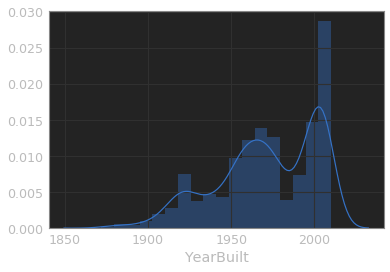

In [4]:
YearBuilt = df_house_prices['YearBuilt']
sns.distplot(YearBuilt);

In [5]:
numerical_cols = df_house_prices.describe().columns.tolist()

In [6]:
columns = df_house_prices.columns.tolist()
categorical_cols = np.setdiff1d(columns, numerical_cols, assume_unique=False).tolist()

In [7]:
df_house_prices = pd.get_dummies(data=df_house_prices, columns = categorical_cols)

In [32]:
correlation = df_house_prices.corr()
correlation
cor_target = abs(correlation["SalePrice"])
relevant_features = cor_target[cor_target>0.2]
relevant_features
# sns.heatmap(relevant_features, annot=True, cmap=plt.cm.Reds)
# plt.show()

LotFrontage              0.351799
LotArea                  0.263843
OverallQual              0.790982
YearBuilt                0.522897
YearRemodAdd             0.507101
                           ...   
RoofStyle_Gable          0.224744
RoofStyle_Hip            0.235897
SaleCondition_Partial    0.352060
SaleType_New             0.357509
SaleType_WD              0.242598
Name: SalePrice, Length: 75, dtype: float64

There are 38 columns which are numerical, the others are categorical. Most of the houses are built towards the years 2000 and more.

In [ ]:
zoning_classification = df_house_prices['MSZoning'].value_counts()

In [ ]:
sns.barplot(zoning_classification.index,zoning_classification);

Where are agricultural and commercial building classes?

In [ ]:
property_flatness = df_house_prices['LandContour'].value_counts()

In [ ]:
sns.barplot(property_flatness.index,property_flatness);